In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

In [2]:
img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/assets/imori_256x256.png')

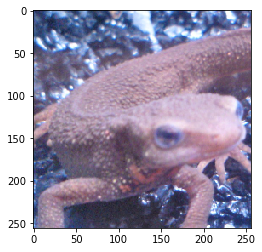

In [3]:
plt.imshow(img_orig)
plt.show()

# Q1　チャンネル入れ替え
RGB->BGR

In [4]:
print(img_orig)

[[[ 46  81 137]
  [ 43  79 115]
  [ 36  50  89]
  ...
  [ 84  84 122]
  [120 115 145]
  [148 144 169]]

 [[ 69  92 134]
  [ 59  83 121]
  [ 43  47  92]
  ...
  [ 79  90 136]
  [102 113 158]
  [119 132 177]]

 [[ 74  94 144]
  [ 60  81 138]
  [ 51  56 112]
  ...
  [104 111 165]
  [ 90 101 163]
  [ 89 104 171]]

 ...

 [[169 214 255]
  [134 192 240]
  [ 91 132 196]
  ...
  [ 42  63 128]
  [ 37  62 116]
  [ 35  63 110]]

 [[119 174 241]
  [ 96 149 219]
  [ 89 121 198]
  ...
  [ 52  71 129]
  [ 46  69 123]
  [ 43  69 120]]

 [[ 96 137 201]
  [114 131 200]
  [111 114 181]
  ...
  [ 66  80 141]
  [ 51  69 135]
  [ 52  71 140]]]


In [5]:
img_bgr = img_orig[:, :, ::-1]
print(img_bgr)

[[[137  81  46]
  [115  79  43]
  [ 89  50  36]
  ...
  [122  84  84]
  [145 115 120]
  [169 144 148]]

 [[134  92  69]
  [121  83  59]
  [ 92  47  43]
  ...
  [136  90  79]
  [158 113 102]
  [177 132 119]]

 [[144  94  74]
  [138  81  60]
  [112  56  51]
  ...
  [165 111 104]
  [163 101  90]
  [171 104  89]]

 ...

 [[255 214 169]
  [240 192 134]
  [196 132  91]
  ...
  [128  63  42]
  [116  62  37]
  [110  63  35]]

 [[241 174 119]
  [219 149  96]
  [198 121  89]
  ...
  [129  71  52]
  [123  69  46]
  [120  69  43]]

 [[201 137  96]
  [200 131 114]
  [181 114 111]
  ...
  [141  80  66]
  [135  69  51]
  [140  71  52]]]


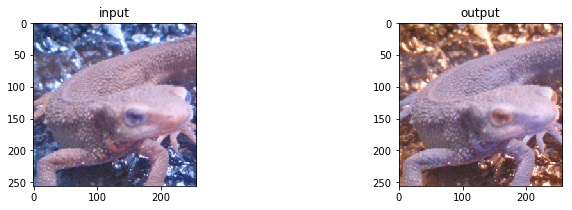

In [6]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1,2,2)
plt.title('output')
plt.imshow(img_bgr)
plt.show()

# Q2　グレイスケール

In [7]:
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

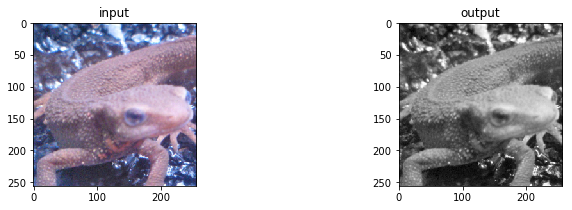

In [8]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1,2,2)
plt.title('output')
plt.imshow(img_gray, cmap='gray')
plt.show()

cmap='gray' https://qiita.com/Daiki_P/items/844bc3a4b271e6ae179b

http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

# Q3　２値化

In [17]:
ret, img_threshold = cv2.threshold(img_gray, 130, 255, cv2.THRESH_BINARY)

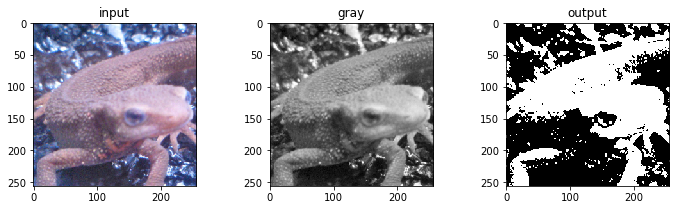

In [18]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1,3,2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1,3,3)
plt.title('output')
plt.imshow(img_threshold, cmap='gray')
plt.show()

https://qiita.com/tokkuri/items/ad5e858cbff8159829e9

# Q4　大津の2値化

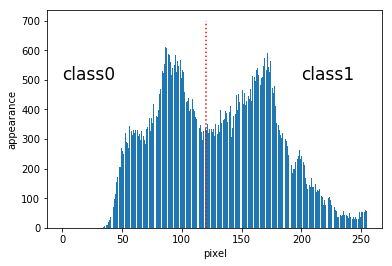

In [19]:
plt.hist(img_gray.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.text(0, 500, 'class0', fontsize=17)
plt.text(200, 500, 'class1', fontsize=17)
plt.vlines(120, 0, 700, color='red', linestyles='dotted')
plt.xlabel('pixel')
plt.ylabel('appearance')
plt.show()

hist https://pythondatascience.plavox.info/matplotlib/%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0

text https://www.yutaka-note.com/entry/2020/01/08/080413#plttext%E4%BD%BF%E7%94%A8%E4%BE%8B

vline https://www.delftstack.com/ja/howto/matplotlib/how-to-plot-horizontal-and-vertical-line-in-matplotlib/

In [21]:
th, img_bin = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('threshold: ', th)

threshold:  129.0


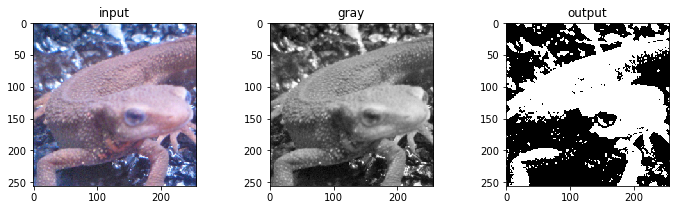

In [22]:
plt.figure(figsize=(12,3))
plt.subplot(1,3,1)
plt.title('input')
plt.imshow(img_orig)
plt.subplot(1,3,2)
plt.title('gray')
plt.imshow(img_gray, cmap='gray')
plt.subplot(1,3,3)
plt.title('output')
plt.imshow(img_bin, cmap='gray')
plt.show()

# HSV変換

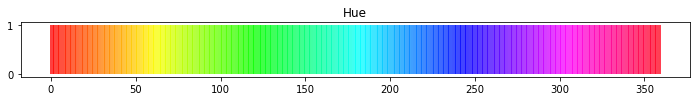

In [24]:
from matplotlib import cm
plt.figure(figsize=(12, 1))
plt.title('Hue')
for i in range(360):
    plt.vlines(i, 0, 1, color=cm.hsv(i / 360))
plt.show()